## SeismoPi: Seismic Analysis of Buried Pipelines

In [2]:
import time
start = time.time()

In [3]:
import sp
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.spatial import distance
from scipy.stats import expon, lognorm
from sp.Intensity import Intensity
from sp.PFragility import plot_FC

In [4]:
from pyproj import Proj
from pyproj import Proj, transform

In [5]:
np.random.seed(100000)

### Data import

In [6]:
# read node and link characteristics
node = pd.read_csv('node_demo.csv')
link = pd.read_csv('pipe_demo.csv')

### Define Earthquake Epicenter:

In [7]:
#Transform from Arc1950 to WGS84
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3395')
x1,y1 = (-122.0784086,38.2789683)
ex,ey = transform(inProj,outProj,x1,y1)
ex,ey

/Users/Ram/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/Ram/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/Users/Ram/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.

(-13589706.28220519, 4592436.47339457)

In [8]:
# Define expicenter coordinates (check with above command)
ex=-13589706.28220519; #this is longitude of the epicenter
ey=4592436.47339457; #this is latitude of the epicenter
M=7 # Richter Magnitude

### Transform coordinates to utm

In [9]:
rx,ry=sp.estimate.tran(node)

/Users/Ram/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/Ram/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/Users/Ram/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.

/Users/Ram/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/Ram/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/Users/Ram/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.

In [10]:
node_id = list(node.id)
rx = list(rx)
ry = list(ry)
typ = list(node.type)
dn1 = {'id':node_id,'x':rx,'y':ry,'type':typ}
df1=pd.DataFrame(dn1)
# df1.set_index('id');

In [11]:
node=df1

### Distance Check and Measure Length of  Links

In [12]:
# check the distance between two different points
L1=df1.x[3],df1.y[3]
L2=df1.x[5],df1.y[5]
dist = distance.euclidean(L1, L2)
print(dist/1000, "km")

14.298549230891647 km


In [13]:
link['link_m']=list(sp.estimate.Length(node,link))

### Classify and plot various components

In [14]:
# node types
a = node[node['type']==1]
b = node[node['type']==2]
c = node[node['type']==3]

In [15]:
# pipe types
p1 = link[link['type']==1]
p2 = link[link['type']==2]

In [16]:
# calculate distances,intensity from epicenter
r1, pga1, pgv1, pos1 = sp.Intensity.intensity_node(a,ex,ey,M)
r2, pga2, pgv2, pos2 = sp.Intensity.intensity_node(b,ex,ey,M)
r3, pga3, pgv3, pos3 = sp.Intensity.intensity_node(c,ex,ey,M)

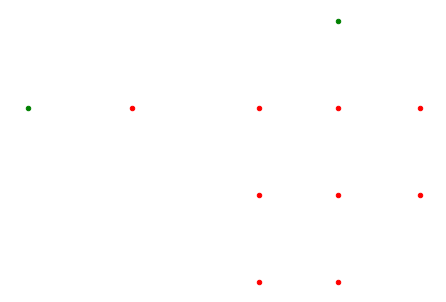

In [17]:
# plot graps with various components
G1=nx.Graph()
G1.add_nodes_from(pos1)
G2=nx.Graph()
G2.add_nodes_from(pos2)
G3=nx.Graph()
G3.add_nodes_from(pos3)
nx.draw(G1,pos1,node_size=20,node_color='r',with_labels=False)
nx.draw(G2,pos2,node_size=20,node_color='b',with_labels=False)
nx.draw(G3,pos3,node_size=20,node_color='g',with_labels=False)

In [18]:
r, pga, pgv, pos = sp.Intensity.intensity_node(node,ex,ey,M)

In [19]:
d1 = []
for index, row in p1.iterrows():
    stt = str(row['start_node'])+str(row['end_node']).rjust(10)
    d1.append(stt)
d2 = []
for index, row in p2.iterrows():
    stt = str(row['start_node'])+str(row['end_node']).rjust(10)
    d2.append(stt)

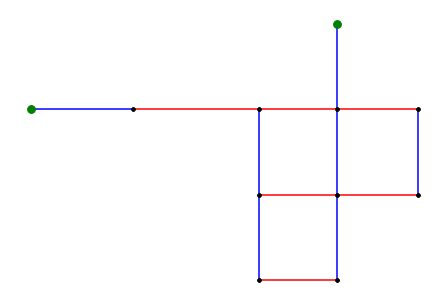

In [20]:
# draw Graph of water network
G4 = nx.parse_edgelist(d1,nodetype=int)
G5 = nx.parse_edgelist(d2,nodetype=int)
nx.draw(G4,pos,node_size=10, node_color='k', edge_color='r',width=1.5)
nx.draw(G5,pos,node_size=10, node_color='k', edge_color='b',width=1.5)
nx.draw(G1,pos1,node_size=10,node_color='k',with_labels=False)
nx.draw(G2,pos2,node_size=10,node_color='k',with_labels=False)
nx.draw(G3,pos3,node_size=60,node_color='g',with_labels=False)
# plt.savefig('Network.png', dpi = 600,bbox_inches='tight')

### PGA for nodes

In [21]:
d = []
for index, row in link.iterrows():
    stt = str(row['start_node'])+str(row['end_node']).rjust(10)
    d.append(stt)

In [22]:
r, pga, pgv, pos = sp.Intensity.intensity_node(node,ex,ey,M)

In [23]:
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))

In [24]:
node_list = list(G.nodes)
pf = {'node_list':node_list}
n_list=pd.DataFrame(pf)

In [25]:
# n_list.tail(1)

In [26]:
node_pga = list(pga)
node_pgv = list(pgv)
ind= list(pos)
pf = {'node_pga':node_pga,'node_pgv':node_pgv,'pid':ind}
n_int=pd.DataFrame(pf)

In [27]:
# n_int.tail(1)

In [28]:
n_out=n_list.merge(n_int, left_on='node_list', right_on='pid')

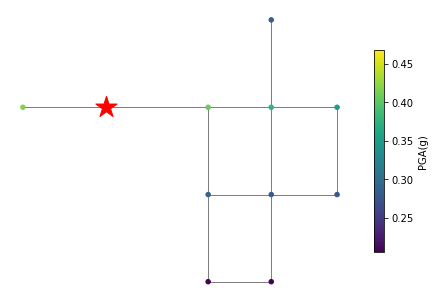

In [29]:
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
# jet=plt.cm.jet
nx.draw(G,pos,node_size=20,edge_color = 'k',node_color=n_out.node_pga,width=0.5,with_labels=False)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(n_out.node_pga.min(), n_out.node_pga.max()))
plt.colorbar(sm,label='PGA(g)',shrink=0.7)
plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('Node_PGA.png', dpi = 600,bbox_inches='tight')

In [30]:
Min, Mean, Max={n_out.node_pga.min(),n_out.node_pga.mean(), n_out.node_pga.max()}
Min, Mean, Max

(0.20628846029464096, 0.3244917516489607, 0.468126922903879)

### PGV for nodes

In [31]:
#convert pgv(m/s) to pgv(in/s)
node_pgv=n_out.node_pgv*100

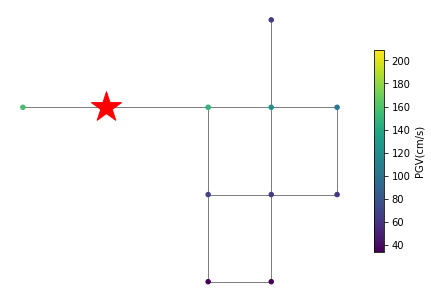

In [32]:
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
# jet=plt.cm.jet
nx.draw(G,pos,node_size=20,edge_color = 'k',node_color=node_pgv,width=0.5,with_labels=False)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(node_pgv.min(), node_pgv.max()))
plt.colorbar(sm,label='PGV(cm/s)',shrink=0.7)
plt.scatter(ex, ey, s=1000, c='r', marker='*', zorder=2)
# plt.savefig('Node_PGV.png', dpi = 600,bbox_inches='tight')

### PGA for Pipelines

In [33]:
dp = []
for index, row in link.iterrows():
    stt = str(row['start_node'])+str(row['end_node']).rjust(10)+str(row['PipID']).rjust(10)
    dp.append(stt)

In [34]:
# calculate intensity for links
pga_link1, pgv_link1 = sp.Intensity.intensity_link(p1,node,ex,ey,M)
pga_link2, pgv_link2 = sp.Intensity.intensity_link(p2,node,ex,ey,M)

In [35]:
p1_id = list(p1.PipID)
pga_link1 = list(pga_link1)
pgv_link1 = list(pgv_link1)
pf = {'Id':p1_id,'pga_link1':pga_link1,'pgv_link1':pgv_link1}
pipe_1=pd.DataFrame(pf)
pipe_1.set_index('Id',inplace=True);

In [36]:
p2_id = list(p2.PipID)
pga_link2 = list(pga_link2)
pgv_link2 = list(pgv_link2)
pf = {'Id':p2_id,'pga_link2':pga_link2,'pgv_link2':pgv_link2}
pipe_2=pd.DataFrame(pf)
pipe_2.set_index('Id',inplace=True);

In [37]:
p_pga=pipe_1.pga_link1.append(pipe_2.pga_link2)
p_pgv=pipe_1.pgv_link1.append(pipe_2.pgv_link2)

In [38]:
pipe_id=list(p_pga.index)
link_pga=list(p_pga)
link_pgv=list(p_pgv)
pf = {'Id':pipe_id,'link_pga':link_pga,'link_pgv':link_pgv}
pipe=pd.DataFrame(pf)

In [39]:
G = nx.parse_edgelist(dp, nodetype = int, data=(('id',int),))
edges= nx.get_edge_attributes(G,'id')

In [40]:
edge_list=list(edges.values())

In [41]:
pk = {'el':edge_list}
edges=pd.DataFrame(pk)

In [42]:
p_out=edges.merge(pipe, left_on='el', right_on='Id')

In [43]:
pipe_pga=p_out.link_pga

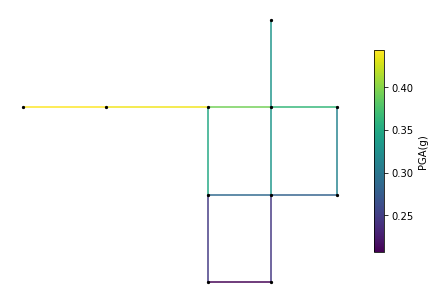

In [44]:
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
jet=plt.cm.jet
nx.draw(G,pos,node_size=5,edge_color =pipe_pga, node_color='k',width=1.5,with_labels=False)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(pipe_pga.min(), pipe_pga.max()))
plt.colorbar(sm,label='PGA(g)',shrink=0.7)
# plt.scatter(ex, ey, s=1000, c='r', marker='*', zorder=2)
# plt.savefig('Link_PGA.png', dpi = 600,bbox_inches='tight')

### PGV for Pipelines

In [45]:
pipe_pgv=p_out.link_pgv*39.3701

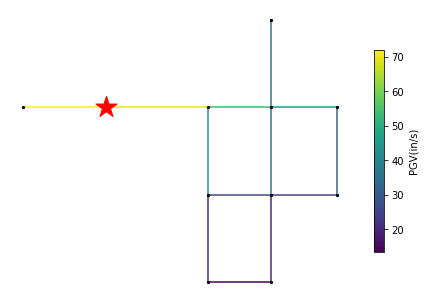

In [46]:
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
jet=plt.cm.jet
nx.draw(G,pos,node_size=5,edge_color =pipe_pgv, node_color='k',width=1.5,with_labels=False)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(pipe_pgv.min(), pipe_pgv.max()))
plt.colorbar(sm,label='PGV(in/s)',shrink=0.7)
plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('Link_PGV.png', dpi = 600,bbox_inches='tight')

In [47]:
Min, Mean, Max={pipe_pgv.min(),pipe_pgv.mean(), pipe_pgv.max()}
Min, Mean, Max

(72.01221363726988, 37.774767771129845, 13.472550662417833)

### ALA Repair Rates

In [48]:
r_rate=0.00187*pipe_pgv

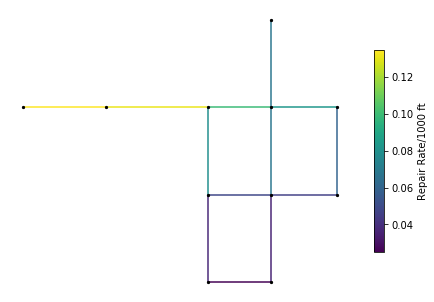

In [49]:
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
jet=plt.cm.jet
nx.draw(G,pos,node_size=5,edge_color =r_rate, node_color='k',width=1.5,with_labels=False)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(r_rate.min(), r_rate.max()))
plt.colorbar(sm,label='Repair Rate/1000 ft',shrink=0.7)
# plt.scatter(ex, ey, s=1000, c='r', marker='*', zorder=2)
# plt.savefig('repair_rate.png', dpi = 600,bbox_inches='tight')

In [50]:
value=r_rate
Min, Mean, Max={value.min(),value.mean(), value.max()}
Min, Mean, Max

(0.025193669738721346, 0.13466283950169466, 0.07063881573201279)

### Label Plot

In [51]:
d = []
for index, row in link.iterrows():
    stt = str(row['start_node'])+str(row['end_node']).rjust(10)+str(row['PipID']).rjust(10)
    d.append(stt)

In [52]:
d = []
for index, row in link.iterrows():
    stt = str(row['start_node'])+str(row['end_node']).rjust(10)+str(row['PipID']).rjust(10)
#     stt = str(row['start node'])+str(row['end node']).rjust(10)
    d.append(stt)

In [53]:
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))

In [54]:
edges= nx.get_edge_attributes(G,'id')

In [55]:
uu=edges.values()
el = list(uu)
# dl= list(fi)
# kl= list(zi)
pk = {'el':el}
T4=pd.DataFrame(pk)

In [56]:
mk = list(pga)
ind= list(pos)
pk = {'ds':mk,'pid':ind}
T1=pd.DataFrame(pk)
# nP.set_index('lp1',inplace=True)

In [57]:
dam=T4.merge(T1, left_on='el', right_on='pid')

In [58]:
# plt.rcParams['figure.figsize'] = [14, 8]
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
# G = nx.parse_edgelist(d,nodetype=int)
jet=plt.cm.jet

### Correction Factors

In [59]:
pipe_info = pd.read_csv('pipe_demo.csv',dtype={'index':str})

In [60]:
pipe_info.set_index('PipID',inplace=True)

In [61]:
C=sp.corrosion_fact.Correction_Modifiers(pipe_info)

In [62]:
link_id=list(C.index)
link_C=list(C)
pf = {'Id':pipe_id,'C':link_C}
c_list=pd.DataFrame(pf)
c_list.tail(2)

,Id,C
11,139,2.5
12,141,2.5


In [63]:
G = nx.parse_edgelist(dp, nodetype = int, data=(('id',int),))
edges= nx.get_edge_attributes(G,'id')
edge_list=list(edges.values())
pk = {'el':edge_list}
c_adj=pd.DataFrame(pk)

In [64]:
c_fact=c_adj.merge(c_list, left_on='el', right_on='Id')

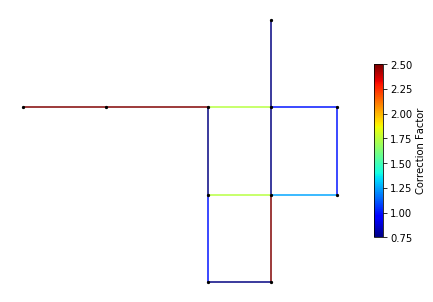

In [65]:
c_color=plt.cm.jet
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =c_fact.C, node_color='k',width=1.5,with_labels=False,edge_cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(c_fact.C.min(), c_fact.C.max()),cmap = c_color)
plt.colorbar(sm,label='Correction Factor',shrink=0.6)
# plt.scatter(ex, ey, s=1000, c='r', marker='*', zorder=2)
# plt.savefig('Correc_Factor.png', dpi = 600,bbox_inches='tight')

### Table_Merged

In [66]:
nn=c_adj.merge(link, left_on='el', right_on='PipID')
rkk=nn.merge(p_out, left_on='el', right_on='Id')
out=rkk.merge(c_fact, left_on='el_x', right_on='el')

In [67]:
out.link_m.sum()/1000

102.3367101857001

In [68]:
out.link_m.min()/100

22.038587509281932

In [69]:
out.link_pgv.min()

0.34220260203600783

In [70]:
out.link_m.min()*out.C.min()*out.link_pgv.min()/1000

0.5656246493155904

### Modified Repair Rate (per 1000 ft) considering Correction Factors

In [71]:
Mod_RR=0.00187*out.link_pgv*39.3701*out.C

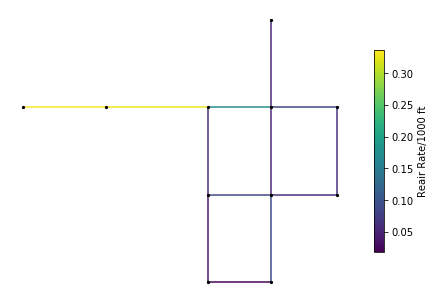

In [72]:
edge_value=Mod_RR
c_color=plt.cm.jet
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =edge_value, node_color='k',width=1.5,with_labels=False)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()))
plt.colorbar(sm,label='Reair Rate/1000 ft',shrink=0.7)
# plt.scatter(ex, ey, s=1000, c='r', marker='*', zorder=2)
# plt.savefig('Mod_RR.png', dpi = 600,bbox_inches='tight')

In [73]:
Min, Mean, Max={Mod_RR.min(),Mod_RR.mean(), Mod_RR.max()}

In [74]:
Min, Mean, Max

(0.01889525230404101, 0.33665709875423666, 0.11027027026585522)

### New Control Variable (Θ)

In [75]:
C_PGV_L=(out.C)*(out.link_pgv*39.3701)*(out.link_m*3.28084/1000)

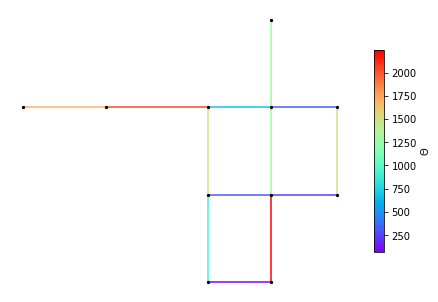

In [76]:
edge_value=C_PGV_L
c_color=plt.cm.rainbow
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =edge_value, node_color='k',width=1.5,with_labels=False,edge_cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)
plt.colorbar(sm,label='Θ',shrink=0.7)
# plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('C_PGV_L.png', dpi = 600,bbox_inches='tight')

In [77]:
Min, Max, Mean={C_PGV_L.min(),C_PGV_L.max(), C_PGV_L.mean()}
Min, Max, Mean

(73.06003844690976, 2243.3439604765795, 1083.8558711631565)

### Pipe Age

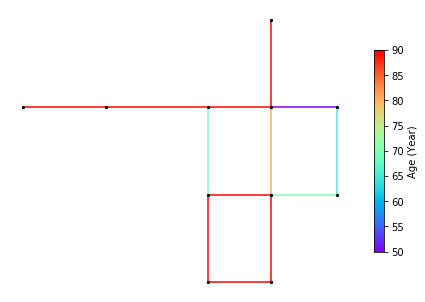

In [78]:
edge_value=2020-out.Age
c_color=plt.cm.rainbow
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =edge_value, node_color='k',width=1.5,with_labels=False,edge_cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)
plt.colorbar(sm,label='Age (Year)',shrink=0.7)
# plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('Age.png', dpi = 600,bbox_inches='tight')

### Probability of Failure

#### Pipe Leak

In [79]:
P_leak=1-np.exp(-0.00187*C_PGV_L)

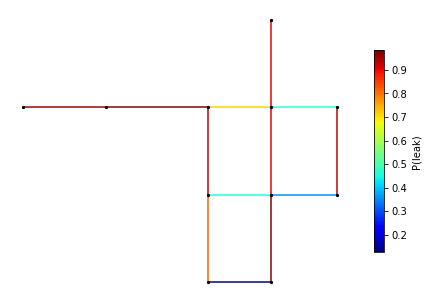

In [80]:
edge_value=P_leak
c_color=plt.cm.jet
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =edge_value, node_color='k',width=1.5,with_labels=False,edge_cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)
plt.colorbar(sm,label='P(leak)',shrink=0.7)
# plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('P_leak.png', dpi = 600,bbox_inches='tight')

#### Pipe Break

In [81]:
P_break=P_leak*0.25

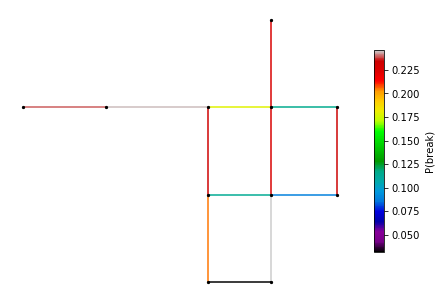

In [82]:
edge_value=P_break
c_color=plt.cm.nipy_spectral
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =edge_value, node_color='k',width=1.5,with_labels=False,edge_cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)
plt.colorbar(sm,label='P(break)',shrink=0.7)
# plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('P_break.png', dpi = 600,bbox_inches='tight')

# Damage States

### Node damage simulations

In [83]:
np.random.seed(10000)

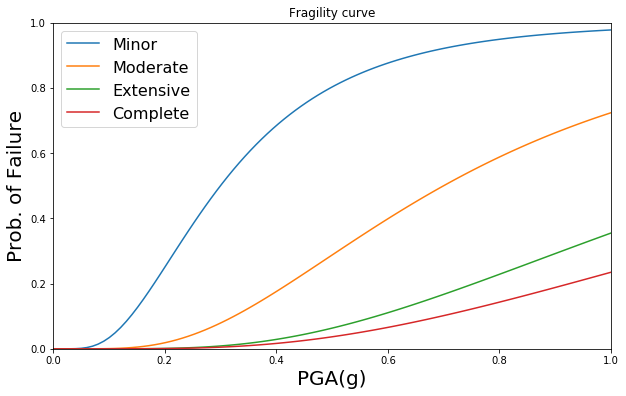

In [84]:
FC=sp.Fragility()
FC.add_dam_state('Minor', 1, {'Default': lognorm(0.60, scale=0.30)})  
FC.add_dam_state('Moderate', 2, {'Default': lognorm(0.60, scale=0.70)})
FC.add_dam_state('Extensive', 3, {'Default': lognorm(0.60, scale=1.25)})
FC.add_dam_state('Complete', 4, {'Default': lognorm(0.65, scale=1.60)})
plot_FC(FC, xlabel='C∙PGV∙L', ylabel='Prob. of Failure',fill=False,xmax=1.0)
plt.xlabel('PGA(g)',size=20)
plt.ylabel('Prob. of Failure',size=20)
plt.legend(prop={'size':16},loc='upper left')
plt.plot(linewidth=2.0)
plt.rc('font',family='Times New Roman')
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.grid(False)
# plt.savefig('Fragility_Tanks.png', dpi = 600,bbox_inches='tight')

In [85]:
r, pga, pgv, pos = sp.Intensity.intensity_node(node,ex,ey,M)

In [86]:
node_id = list(node.id)
pga_val = list(pga)
dn1 = {'Id':node_id,'pga1':pga_val}
df1=pd.DataFrame(dn1)
df1.set_index('Id',inplace=True);

In [87]:
np.random.seed(12345)
node_Pr = FC.cdf_probability(df1['pga1'])
node_damage_state = FC.sample_damage_state(node_Pr)
node_damage_state_map = FC.get_level_map()
node_damage_val = node_damage_state.map(node_damage_state_map)
node_damage_val.value_counts()

0    7
1    4
dtype: int64

In [88]:
node_damage_val;

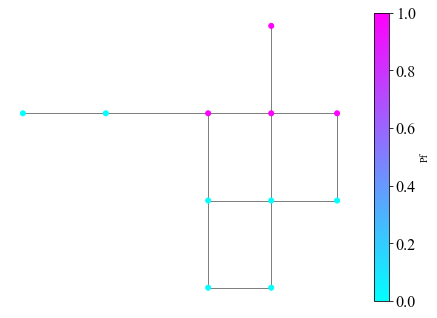

In [89]:
edge_value=node_damage_val
c_color=plt.cm.cool
nx.draw(G,pos,node_size=25,edge_color ='k', node_color=edge_value, width=0.5,with_labels=False,cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)
plt.colorbar(sm,label='Pf')
# plt.savefig('Source_Damage.png', dpi = 600,bbox_inches='tight')

### Pipe damage simulations

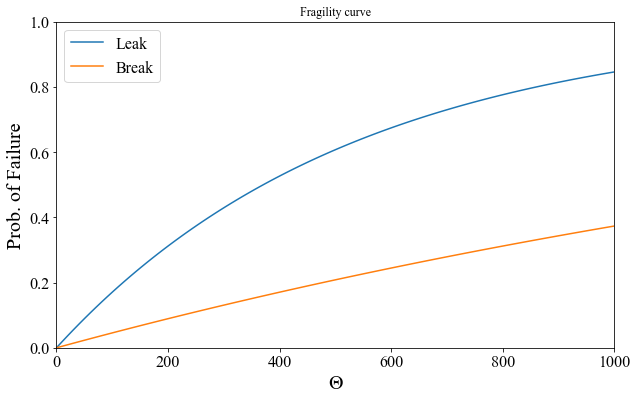

In [90]:
pFC = sp.Fragility()
pFC.add_dam_state('Break', 2, {'Default': expon(scale=1/(0.00187*.25))})
pFC.add_dam_state('Leak', 1, {'Default': expon(scale=1/(0.00187))})
plot_FC(pFC, xlabel='Θ', ylabel='Prob. of Failure',fill=False,xmax=1000)
plt.xlabel('Θ',size=20)
plt.ylabel('Prob. of Failure',size=20)
plt.legend(prop={'size':16},loc='upper left')
plt.rc('font',family='Times New Roman')
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.grid(False)
# plt.savefig('Fragility.png', dpi = 600,bbox_inches='tight')

In [91]:
pga_link,pgv_link = sp.Intensity.intensity_link(link,node,ex,ey,M)

In [92]:
p11_id = list(link.PipID)
p11_pga=list(pgv_link)
p11_len=list(out.link_m)
CV=list(C_PGV_L)
pk = {'Id':p11_id,'pgv':p11_pga,'len':p11_len,'CV':C_PGV_L}
pip_f=pd.DataFrame(pk)
pip_f.set_index('Id',inplace=True)

In [93]:
np.random.seed(12345)
pipe_Pr = pFC.cdf_probability(pip_f['CV'])
pipe_damage_state = pFC.sample_damage_state(pipe_Pr)
pipe_damage_state_map = pFC.get_level_map()
pipe_damage_val = pipe_damage_state.map(pipe_damage_state_map)
pipe_damage_val.value_counts()

1    5
2    4
0    4
dtype: int64

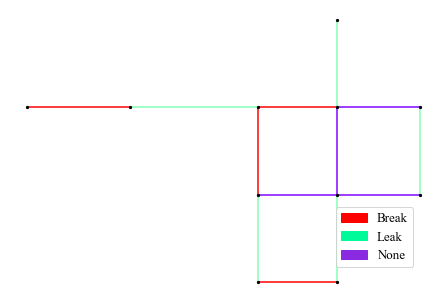

In [94]:
# plt.rcParams['figure.figsize'] = [5.5, 5]
edge_value=pipe_damage_val
c_color=plt.cm.rainbow
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =edge_value, node_color='k',width=1.5,with_labels=False,edge_cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)

red_patch = mpatches.Patch(color='red', label='Break')
cyan_patch = mpatches.Patch(color='mediumspringgreen', label='Leak')
blue_patch = mpatches.Patch(color='blueviolet', label='None')

plt.legend(handles=[red_patch,cyan_patch, blue_patch],loc=10,fontsize=13,bbox_to_anchor=(0.8, 0.0, 0.1, 0.4))
# plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=1)
# plt.savefig('Damage_States.png', dpi = 600,bbox_inches='tight')

### Betweenness Centrality

In [95]:
bc_edge=list(nx.edge_betweenness_centrality(G).values())

In [96]:
ebc=pd.Series(bc_edge)

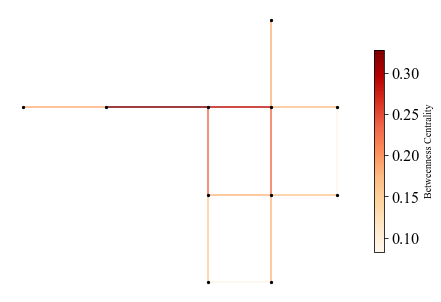

In [97]:
edge_value=ebc
c_color=plt.cm.OrRd
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =edge_value, node_color='k',width=1.5,with_labels=False,edge_cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)
plt.colorbar(sm,label='Betweenness Centrality',shrink=0.7)
# plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('EBC.png', dpi = 600,bbox_inches='tight')

In [98]:
bc_node=list(nx.betweenness_centrality(G).values())

In [99]:
nbc=pd.Series(bc_node)

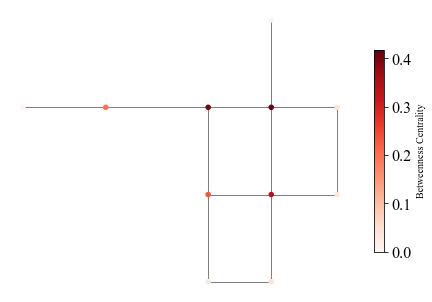

In [100]:
edge_value=nbc
c_color=plt.cm.Reds
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=20,edge_color ='k', node_color=edge_value,width=.5,with_labels=False,cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)
plt.colorbar(sm,label='Betweenness Centrality',shrink=0.7)
# plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('NBC.png', dpi = 600,bbox_inches='tight')

### Normalized EBC

In [101]:
ebc=pd.Series(bc_edge)

In [102]:
norm_ebc=(ebc-ebc.min())/(ebc.max()-ebc.min())

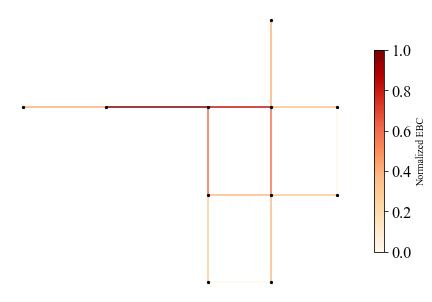

In [103]:
edge_value=norm_ebc
c_color=plt.cm.OrRd
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =edge_value, node_color='k',width=1.5,with_labels=False,edge_cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)
plt.colorbar(sm,label='Normalized EBC',shrink=0.7)
# plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('Norm_EBC.png', dpi = 600,bbox_inches='tight')

### Condition Index

In [104]:
pc_id = list(link.PipID)
pc_age=list(0.0003*(2020-out.Age)**2-0.0003*(2020-out.Age)+1)
pk = {'Id':pc_id,'CI':pc_age}
pc_f=pd.DataFrame(pk)
pc_f.set_index('Id',inplace=True)

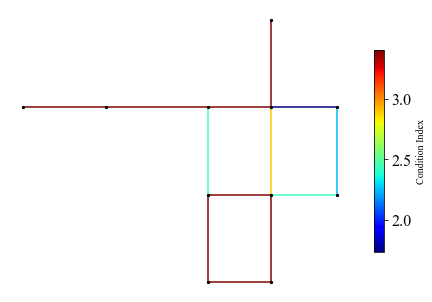

In [105]:
edge_value=pc_f.CI
c_color=plt.cm.jet
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =edge_value, node_color='k',width=1.5,with_labels=False,edge_cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)
plt.colorbar(sm,label='Condition Index',shrink=0.7)
# plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('CI.png', dpi = 600,bbox_inches='tight')

In [106]:
Min, Mean, Max={pc_f.CI.min(),pc_f.CI.mean(), pc_f.CI.max()}
Min, Mean, Max

(3.4029999999999996, 1.7349999999999999, 3.000076923076923)

### Normalized Condition Index

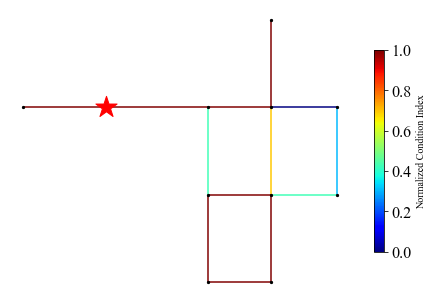

In [107]:
norm_CI=(pc_f.CI-pc_f.CI.min())/(pc_f.CI.max()-pc_f.CI.min())
edge_value=norm_CI
c_color=plt.cm.jet
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =edge_value, node_color='k',width=1.5,with_labels=False,edge_cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)
plt.colorbar(sm,label='Normalized Condition Index',shrink=0.7)
plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('Norm_CI.png', dpi = 600,bbox_inches='tight')

### Maintenance Action

In [108]:
pc_id = list(link.PipID)

In [109]:
pc_id = list(link.PipID)
CI=list(norm_CI)
nbc=list(norm_ebc)
pk = {'Id':pc_id,'CI':CI,'nbc':norm_ebc}
cost=pd.DataFrame(pk)
cost.set_index('Id',inplace=True)

In [110]:
Index=cost.CI*0.7+cost.nbc*0.3

In [111]:
Index=cost.CI*0.7+cost.nbc*0.3
pc_id = list(link.PipID)
ind=list(Index)
dl=list(pipe_damage_val)
pk = {'Id':pc_id,'ind':ind,'dl':dl}
need=pd.DataFrame(pk)
need.set_index('Id',inplace=True)

In [112]:
mmm=need[(need.ind>0.5)&(need.dl>0)]

In [113]:
link['link_m']=list(sp.Length(node,link))

In [114]:
need.dl.value_counts()

1    5
2    4
0    4
Name: dl, dtype: int64

In [115]:
need['MA']=list(sp.C_Check(need))

In [116]:
need.MA.value_counts()

2    7
0    4
1    2
Name: MA, dtype: int64

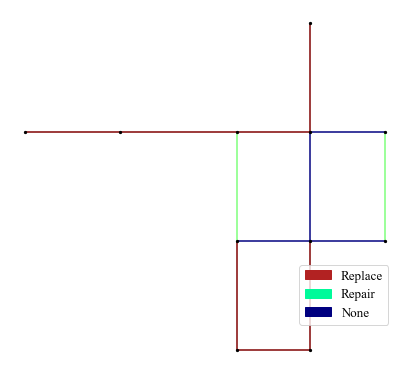

In [117]:
plt.rcParams['figure.figsize'] = [5.5, 5]
edge_value=need.MA
c_color=plt.cm.jet
G = nx.parse_edgelist(d, nodetype = int, data=(('id',int),))
nx.draw(G,pos,node_size=5,edge_color =edge_value, node_color='k',width=1.5,with_labels=False,edge_cmap = c_color)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(edge_value.min(), edge_value.max()),cmap = c_color)
red_patch = mpatches.Patch(color='firebrick', label='Replace')
cyan_patch = mpatches.Patch(color='mediumspringgreen', label='Repair')
blue_patch = mpatches.Patch(color='navy', label='None')
plt.legend(handles=[red_patch,cyan_patch, blue_patch],loc=10,fontsize=13,bbox_to_anchor=(0.8, 0.0, 0.1, 0.4))
# plt.scatter(ex, ey, s=500, c='r', marker='*', zorder=2)
# plt.savefig('MA.png', dpi = 600,bbox_inches='tight')

In [118]:
need[need.MA>=1].to_csv('pipe_repair.csv')

### Repair Cost Estimation

In [119]:
nw=need.merge(out, left_on='Id', right_on='el_x')

In [120]:
nw['NoB']=(0.00187*nw.link_pgv*39.3701*nw.C)*(nw.link_m*3.28084/1000)

In [121]:
nw.NoB;
nw['nNoB']=np.ceil(nw.NoB).astype(int)

In [122]:
xT,yT=sp.T_cost(nw)

In [123]:
nw['repair_C']=xT
nw['replace_C']=yT

In [124]:
nw['T_Cost']=list(sp.C_Est(nw))

In [125]:
Cost_for_repair=print(nw[nw.MA==1].T_Cost.sum())

5200.0


In [126]:
Cost_for_replace=print(nw[nw.MA==2].T_Cost.sum())

100194773.95081207


In [127]:
total_maintenace_cost=print(nw.T_Cost.sum())

100199973.95081207


#### Repairable Length

In [128]:
nw[nw.MA>0].link_m.sum()/1000

57.69944310815353

In [129]:
nw[nw.MA>1].link_m.sum()/1000

41.383266606010494

In [130]:
#Per_Cost_graph

In [131]:
Costt=nw.T_Cost

### Isolated Graph after removing damaged components

In [132]:
n_link=nw[nw.MA==0]

In [133]:
pp = []
for index, row in n_link.iterrows():
    stt = str(row['start_node'])+str(row['end_node']).rjust(10)
    pp.append(stt)

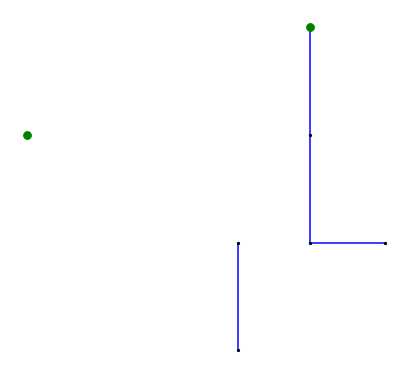

In [134]:
# draw Graph of water network
G = nx.parse_edgelist(pp,nodetype=int)
nx.draw(G,pos,node_size=5, node_color='k', edge_color='b',width=1.5)
nx.draw(G3,pos3,node_size=60,node_color='g',with_labels=False)
# plt.savefig('Isolated_Map.png', dpi = 600,bbox_inches='tight')

In [135]:
nx.number_of_isolates(G)

0

In [136]:
end = time.time()
print(end - start)

13.73403000831604
